dqn
logs/dqn/2.log
logs/dqn/1.log
--------------------
ddqn
logs/ddqn/2.log
logs/ddqn/1.log
--------------------
adqn
logs/adqn/1.log
--------------------
reinforce
logs/reinforce/1.log
--------------------
actor_critic
logs/actor_critic/1.log
--------------------


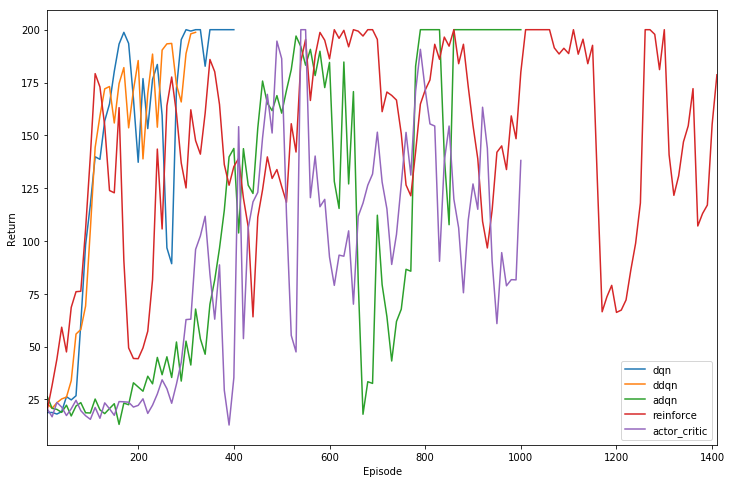

In [6]:
import re
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

algorithms = ['dqn', 'ddqn', 'adqn', 'reinforce', 'actor_critic']

def parse(log):
    print(log)
    with open(log) as f:
        if 'adqn' in str(log):
            content= ''.join([line for line in f if 'Process 0' in line])
        else:
            content = f.read()
        rewards = list(map(int, re.findall(r'steps:(\d+)', content)))
        return pd.Series(rewards)     

fig, ax = plt.subplots(figsize=(12, 8))
for alg in algorithms:
    p = Path('logs').joinpath(alg)
    print(alg)
    if p.is_dir():
        d = {}
        for log in p.iterdir():
            if log.is_file():
                d[log.name] = parse(log)
        df = pd.DataFrame(d)
        N = 10 # group size, average every N episodes
        df = df.groupby(df.index//N).mean()
        ser = df.mean(axis=1)
        ser.index = np.arange(1, len(ser)+1)*N
        ser.plot(ax=ax, label=alg)
    print('-'*20)

ax.set_xlabel('Episode')
ax.set_ylabel('Return')
ax.legend()